#Preparation

##Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None
matplotlib.rcParams['figure.figsize'] = (15, 8)

##Import Data

In [2]:
df = pd.read_csv('/content/movies.csv')
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6378,Jack the Giant Slayer,PG-13,Adventure,2013,"March 1, 2013 (United States)",6.2,134000.0,Bryan Singer,Darren Lemke,Nicholas Hoult,United Kingdom,195000000.0,197687603.0,New Line Cinema,114.0
1117,Au Revoir les Enfants,PG,Drama,1987,"February 12, 1988 (United States)",8.0,32000.0,Louis Malle,Louis Malle,Gaspard Manesse,France,NaN,4575613.0,Nouvelles Éditions de Films (NEF),104.0
3622,Plunkett & Macleane,R,Action,1999,"April 2, 1999 (United Kingdom)",6.4,9700.0,Jake Scott,Selwyn Roberts,Robert Carlyle,United Kingdom,NaN,474900.0,Arts Council of England,99.0
3998,One Night at McCool's,R,Comedy,2001,"April 27, 2001 (United States)",6.1,29000.0,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000.0,13578186.0,October Films,93.0
180,Zoot Suit,R,Drama,1981,"January 1, 1982 (United States)",6.8,1100.0,Luis Valdez,Luis Valdez,Daniel Valdez,United States,2700000.0,3256082.0,Universal Pictures,103.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


#Data Cleaning

##Handling Missing Values

In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

###Fills null values ​​with the mean value

In [5]:
mean_budget = df['budget'].mean()
df['budget'] = df['budget'].fillna(mean_budget)
df['budget'].isna().sum()

0

In [6]:
mean_gross = df['gross'].mean()
df['gross'] = df['gross'].fillna(mean_gross)
df['gross'].isna().sum()

0

In [7]:
modus_rating = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(modus_rating)
df['rating'].isna().sum()

0

###Drop the rest of null values

In [8]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

##Change Data Type

In [9]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [10]:
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1102,Throw Momma from the Train,PG-13,Comedy,1987,"December 11, 1987 (United States)",6.3,35000,Danny DeVito,Stu Silver,Danny DeVito,United States,14000000,57915972,Orion Pictures,88
2830,Far from Home: the Adventures of Yellow Dog,PG,Adventure,1995,"January 13, 1995 (United States)",6.4,2700,Phillip Borsos,Phillip Borsos,Jesse Bradford,United States,35589876,11642946,Twentieth Century Fox,81
6819,Hyena Road,R,Action,2015,"October 9, 2015 (Canada)",6.5,7300,Paul Gross,Paul Gross,Rossif Sutherland,Canada,35589876,87768,Rhombus Media,120
6504,Teenage Mutant Ninja Turtles,PG-13,Action,2014,"August 8, 2014 (United States)",5.8,203000,Jonathan Liebesman,Josh Appelbaum,Megan Fox,United States,125000000,485004754,Paramount Pictures,101
2822,The Incredibly True Adventure of Two Girls in ...,R,Comedy,1995,"June 16, 1995 (United States)",6.5,4400,Maria Maggenti,Maria Maggenti,Laurel Holloman,United States,250000,2210408,Fine Line Features,94


###To ensure that the values in the year and released columns are exact

In [11]:
df = df.drop('year', axis =1)
df['year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.sample(5)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
6041,The Dilemma,PG-13,Comedy,"January 14, 2011 (United States)",5.3,53000,Ron Howard,Allan Loeb,Vince Vaughn,United States,70000000,69721966,Universal Pictures,111,2011
5077,Funny Games,R,Crime,"April 4, 2008 (United Kingdom)",6.6,93000,Michael Haneke,Michael Haneke,Naomi Watts,United States,15000000,7938872,Celluloid Dreams,111,2008
311,Hammett,PG,Crime,"September 17, 1982 (United States)",6.5,3000,Wim Wenders,Joe Gores,Frederic Forrest,United States,35589876,42914,Orion Pictures,97,1982
515,The Adventures of Buckaroo Banzai Across the 8...,PG,Adventure,"October 5, 1984 (Canada)",6.4,25000,W.D. Richter,Earl Mac Rauch,Peter Weller,United States,35589876,6254148,Sherwood Productions,103,1984
2727,The Baby-Sitters Club,PG,Comedy,"August 18, 1995 (United States)",5.8,5500,Melanie Mayron,Ann M. Martin,Schuyler Fisk,United States,6500000,9685976,Beacon Communications,94,1995


###Check Duplicate Data

In [12]:
df.drop_duplicates()
len(df)-len(df.drop_duplicates())

0

Actually, there aren't any duplicate in this dataset

#Finding Correlation

My hypothesis is that the **company** and **budget** have the highest correlation with **gross** income.

Large companies often generate more gross income, and the larger the budget, the greater the gross income.

In [13]:
df.corr()

,score,votes,budget,gross,runtime,year
score,1.000000,0.409432,0.064169,0.182866,0.399965,0.106108
votes,0.409432,1.000000,0.420949,0.628744,0.308907,0.218802
budget,0.064169,0.420949,1.000000,0.711729,0.265121,0.261171
gross,0.182866,0.628744,0.711729,1.000000,0.241296,0.245795
runtime,0.399965,0.308907,0.265121,0.241296,1.000000,0.119595
year,0.106108,0.218802,0.261171,0.245795,0.119595,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

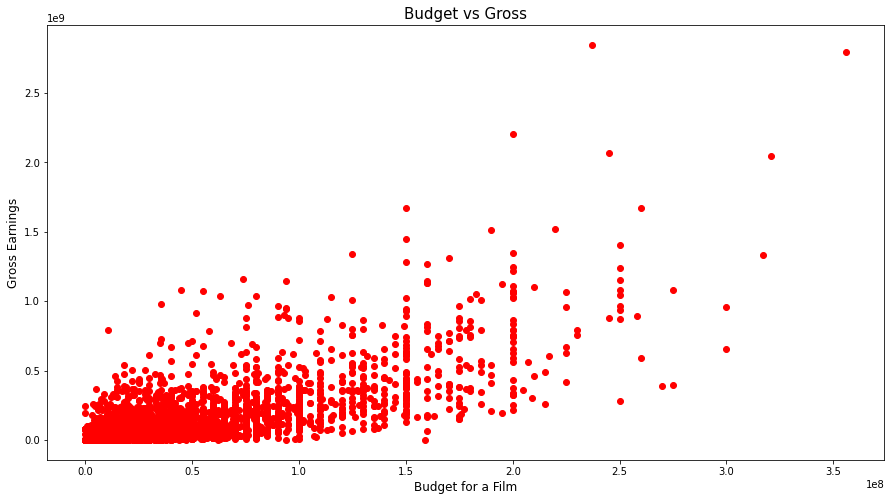

In [14]:
plt.scatter(color='red', x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross', fontsize=15, color='black')
plt.xlabel('Budget for a Film', fontsize = 12)
plt.ylabel('Gross Earnings', fontsize = 12)
plt.show

Text(0, 0.5, 'Gross Earnings')

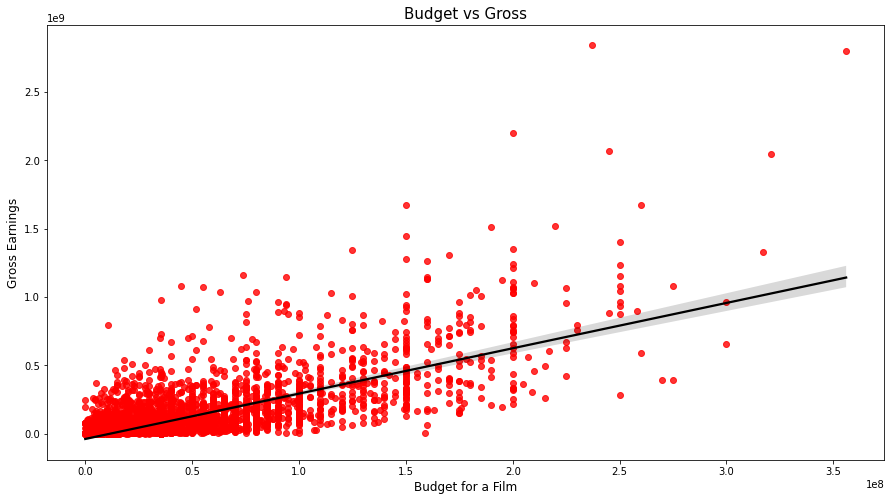

In [15]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'black'})
plt.title('Budget vs Gross', fontsize=15, color='black')
plt.xlabel('Budget for a Film', fontsize = 12)
plt.ylabel('Gross Earnings', fontsize = 12)

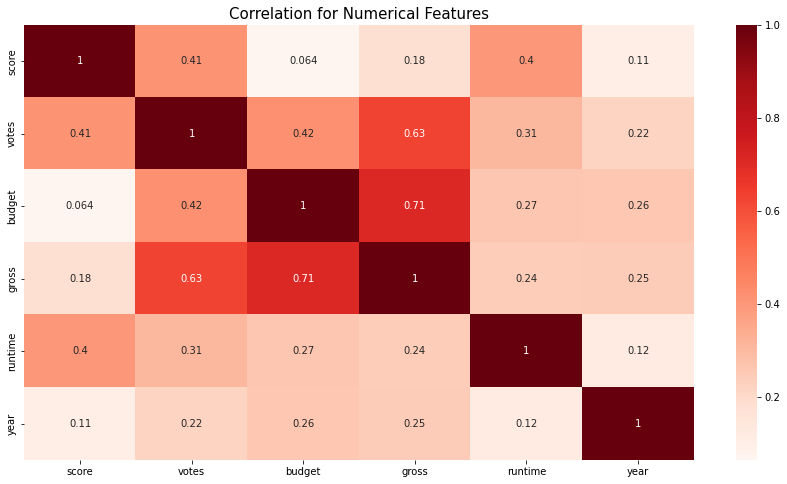

In [16]:
df_num_corr = df.corr()
sns.heatmap(df_num_corr, cmap='Reds',annot=True)
plt.title('Correlation for Numerical Features', fontsize=15, color='black')
plt.show()

Show all the high correlations between the features

In [17]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.sample(5)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
7114,1021,6,0,2086,6.0,44000,681,3558,1871,55,25000000,26800152,1883,100,2017
3132,400,6,4,784,5.1,24000,163,2150,2626,54,25000000,26570463,1270,105,1997
2741,7332,6,0,602,5.9,6600,2850,3353,1154,55,30000000,2193982,2201,98,1995
280,5568,6,5,914,6.4,6100,2806,1094,1041,55,22000000,6118683,916,108,1982
2833,3107,8,6,3026,6.9,1500,233,2360,2721,14,35589876,230049,694,90,1996


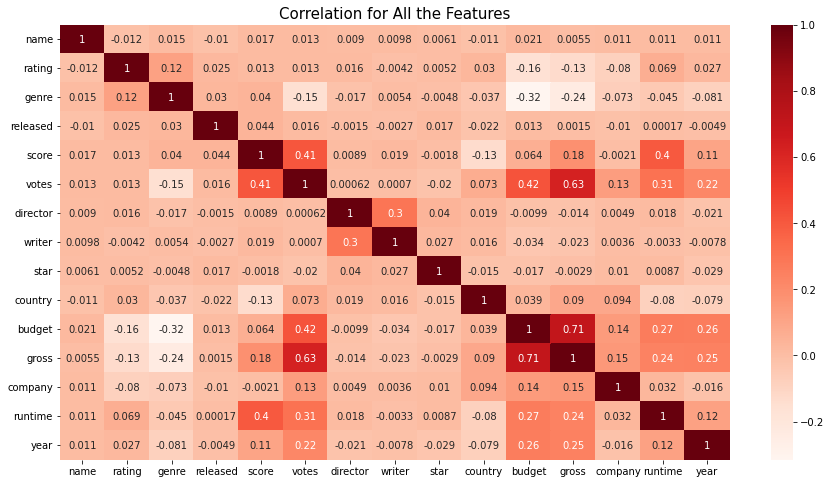

In [18]:
df_num_corr = df_numerized.corr()
sns.heatmap(df_num_corr, cmap='Reds',annot=True)
plt.title('Correlation for All the Features', fontsize=15, color='black')
plt.show()

In [19]:
df_corr = df_numerized.corr()
all_corr = df_corr.unstack()
all_corr

name  name        1.000000
      rating     -0.012432
      genre       0.015231
      released   -0.010470
      score       0.016603
                    ...   
year  budget      0.261171
      gross       0.245795
      company    -0.015863
      runtime     0.119595
      year        1.000000
Length: 225, dtype: float64

In [20]:
sorted_corr = all_corr.sort_values()
sorted_corr

budget    genre      -0.315727
genre     budget     -0.315727
          gross      -0.237938
gross     genre      -0.237938
budget    rating     -0.156784
                        ...   
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
year      year        1.000000
Length: 225, dtype: float64

In [21]:
high_corr = sorted_corr[(sorted_corr < 1) & (sorted_corr > 0.5)]
high_corr

votes   gross     0.628744
gross   votes     0.628744
budget  gross     0.711729
gross   budget    0.711729
dtype: float64

It turns out that **votes** and **budgets** have the highest correlation to **gross** profits, not the **company**.

Text(0, 0.5, 'Gross Earnings')

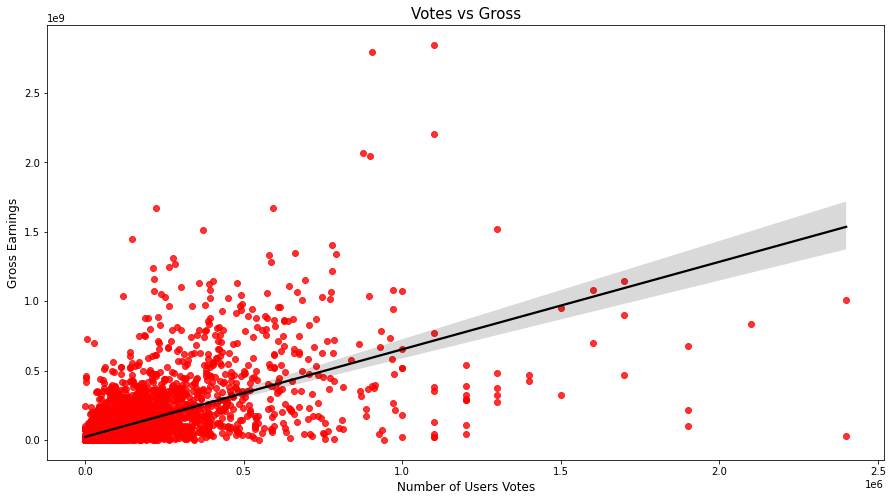

In [22]:
sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'black'})
plt.title('Votes vs Gross', fontsize=15, color='black')
plt.xlabel('Number of Users Votes', fontsize = 12)
plt.ylabel('Gross Earnings', fontsize = 12)

Text(0, 0.5, 'Gross Earnings')

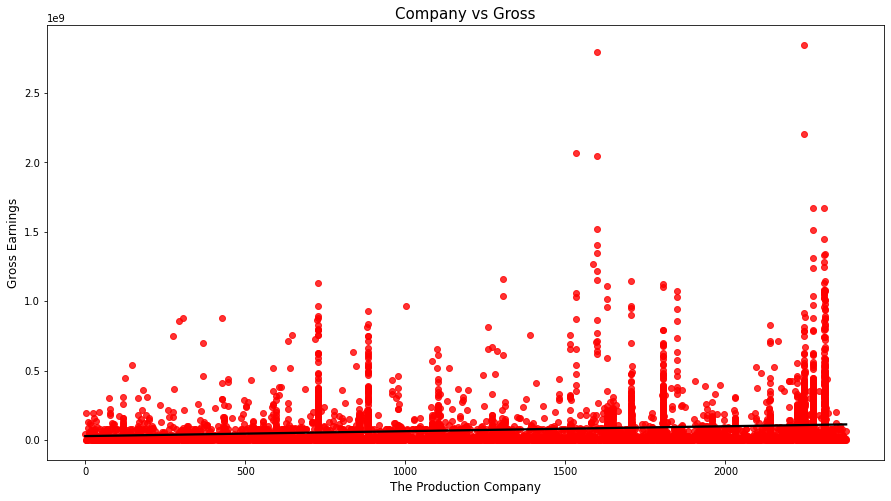

In [23]:
sns.regplot(x='company', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'black'})
plt.title('Company vs Gross', fontsize=15, color='black')
plt.xlabel('The Production Company', fontsize = 12)
plt.ylabel('Gross Earnings', fontsize = 12)